这章介绍的针对回归类型的散点数据的可视化可能是未来机器学习最直接的助理，这章给我的感悟很多。

许多数据集包含多个定量变量，分析的目的通常是将这些变量相互关联起来。 我们以前讨论过可以通过显示两个变量的联合分布来实现的功能。 然而，使用统计模型来估计两个噪声观测组之间的简单关系可能是非常有帮助的。 本章讨论的功能将通过线性回归的通用框架进行。

在Tukey的精神中，Seaborn的回归图主要是为了添加一个视觉指南，有助于在探索性数据分析期间强调数据集中的模式。 也就是说，Seaborn本身并不是统计分析的一揽子计划。 要获得与回归模型拟合相关的量化措施，您应该使用statsmodels。 然而，Seaborn的目标是通过可视化快速，轻松地探索数据集，使之变得与通过统计表格来探索数据集一样重要（如果不是更重要的话）。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "regression")))

tips = sns.load_dataset("tips")

## 绘制线性回归模型的函数

用Seaborn中的两个主要功能可视化通过回归确定的线性关系。这些函数regplot()和lmplot()是密切相关的，并且共享了大部分的核心功能。然而，了解他们不同的方式很重要，以便您可以快速为特定工作选择正确的工具。

在最简单的调用中，两个函数绘制了两个变量x和y的散点图，然后拟合回归模型y〜x并绘制了该回归线的结果回归线和95％置信区间：

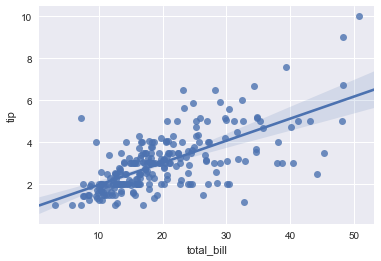

In [2]:
sns.regplot(x="total_bill", y="tip", data=tips);

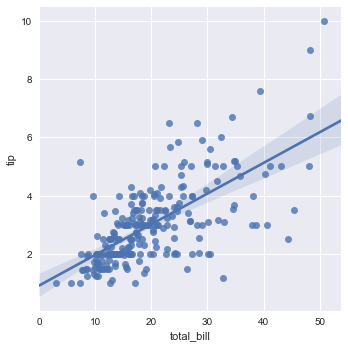

In [5]:
sns.lmplot(x="total_bill", y="tip", data=tips);

很显然，所得到的的图的结果是相同的，除了图形形状略有些不同，这里会简短的解释。

目前，要知道的另一个主要区别是regplot()以各种格式接受x和y变量，包括numpy数组、Pandas的Series列或DataFrame对象的变量引用；不一样的是，lmplot()将数据集作为一个必需的参数，而x和y变量必须指定为字符串。这种数据格式称为“长格式”或“整洁”数据。除了这种输入灵活性，regplot()可以看做是拥有lmplot()特征的子集，所以后面将使用后者进行演示。

备注：

这里官方的例子实际上并不好，比较容易的理解方式是：上面的结果可以在regplot()函数中通过只传入x和y绘出：sns.regplot(x=tips["total_bill"], y=tips["tip"])；而相应的sns.lmplot(x=tips["total_bill"], y=tips["tip"])这种写法就会报错，因为数据集data是lmplot()的必传参数。

当其中一个变量取值为离散型的时候，可以拟合一个线性回归。然而，这种数据集生成的简单散点图通常不是最优的：

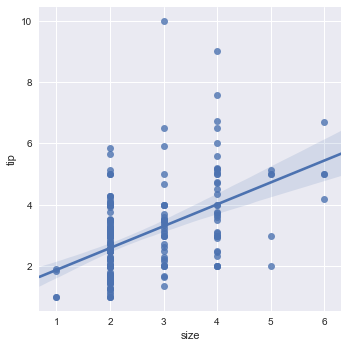

In [10]:
sns.lmplot(data=tips,x="size",y="tip")

一个常用的方法是为离散值添加一些随机噪声的“抖动”(jitter)，使得这些值的分布更加明晰。

值得注意的是，抖动仅适用于散点图数据，且不会影响拟合的回归线本身

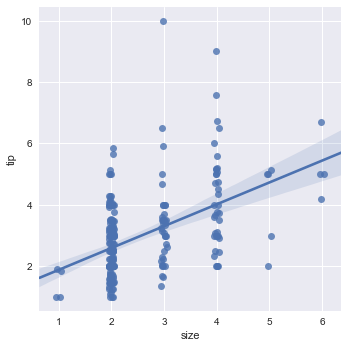

In [11]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05)

另一种选择是在每个独立的数据分组中对观察结果进行折叠，以绘制中心趋势的估计以及置信区间：

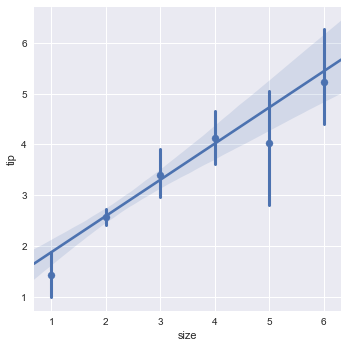

In [12]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## 不同类型的模型拟合

上面使用的简单线性回归模型非常简单，但是，它不适用于某些种类的数据集。

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


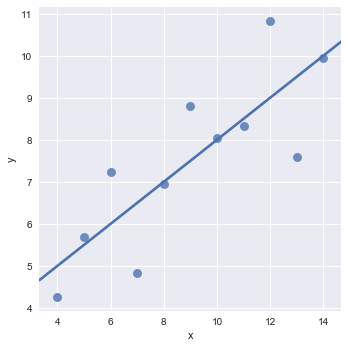

In [14]:
anscombe = sns.load_dataset("anscombe")
print(anscombe.head())
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});